# Analisis de Integridad de Datos

- En este analisis se quiere ver la distribucion de la base de datos DEIS de Egresos Hospitalarios.
- Estos resultados se quieren contrastar con los datos del tablero DEIS MINSAL y con los datos de GRD.
- Los datos solamente corresponderan al estrato del Torax

In [1]:
import polars as pl
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import funciones_auxiliares_hito_1 as aux
from lectura_archivos import leer_grd

sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (12, 6)

## Lectura de Datos

- Aqui se filtra solamente para el Torax
- Se filtran todos los egresos ambulatorios!

In [12]:
torax = leer_grd().filter(
    (pl.col("COD_HOSPITAL") == 112103) & (pl.col("TIPO_ACTIVIDAD") != "HOSPITALIZACIÓN DIURNA")
)
torax_pandas = torax.to_pandas()

## Cantidad de Egresos Hospitalarios

- En este caso, se quiere ver la cantidad de egresos hospitalarios por año

In [13]:
numero_egresos_grd = torax_pandas.groupby("ANIO_EGRESO")["DIAGNOSTICO1"].count()
display(numero_egresos_grd)


ANIO_EGRESO
2019    5435
2020    2853
2021    3086
Name: DIAGNOSTICO1, dtype: int64

## Cantidad de Valores Faltantes

,cantidad_na,porcentaje_na
COD_HOSPITAL,0,0.00
CIP_ENCRIPTADO,0,0.00
SEXO,0,0.00
FECHA_NACIMIENTO,0,0.00
ETNIA,0,0.00
...,...,...
IR_29301_SEVERIDAD,0,0.00
IR_29301_MORTALIDAD,0,0.00
HOSPPROCEDENCIA,7551,66.39
ESTANCIA,0,0.00


,cantidad_na,porcentaje_na
COD_HOSPITAL,0,0.00
CIP_ENCRIPTADO,0,0.00
SEXO,0,0.00
FECHA_NACIMIENTO,0,0.00
ETNIA,0,0.00
PROVINCIA,0,0.00
COMUNA,0,0.00
NACIONALIDAD,0,0.00
PREVISION,0,0.00
SERVICIO_SALUD,0,0.00


,cantidad_na,porcentaje_na
PESORN4,11374,100.00
SEXORN4,11374,100.00
RN4ESTADO,4671,41.07
DIAGNOSTICO1,0,0.00
DIAGNOSTICO2,178,1.56
DIAGNOSTICO3,632,5.56
DIAGNOSTICO4,1536,13.50
DIAGNOSTICO5,2796,24.58
DIAGNOSTICO6,4250,37.37
DIAGNOSTICO7,5748,50.54


,cantidad_na,porcentaje_na
PROCEDIMIENTO13,6767,59.50
PROCEDIMIENTO14,7141,62.78
PROCEDIMIENTO15,7463,65.61
PROCEDIMIENTO16,7753,68.16
PROCEDIMIENTO17,8012,70.44
PROCEDIMIENTO18,8256,72.59
PROCEDIMIENTO19,8499,74.72
PROCEDIMIENTO20,8717,76.64
PROCEDIMIENTO21,8936,78.57
PROCEDIMIENTO22,9149,80.44


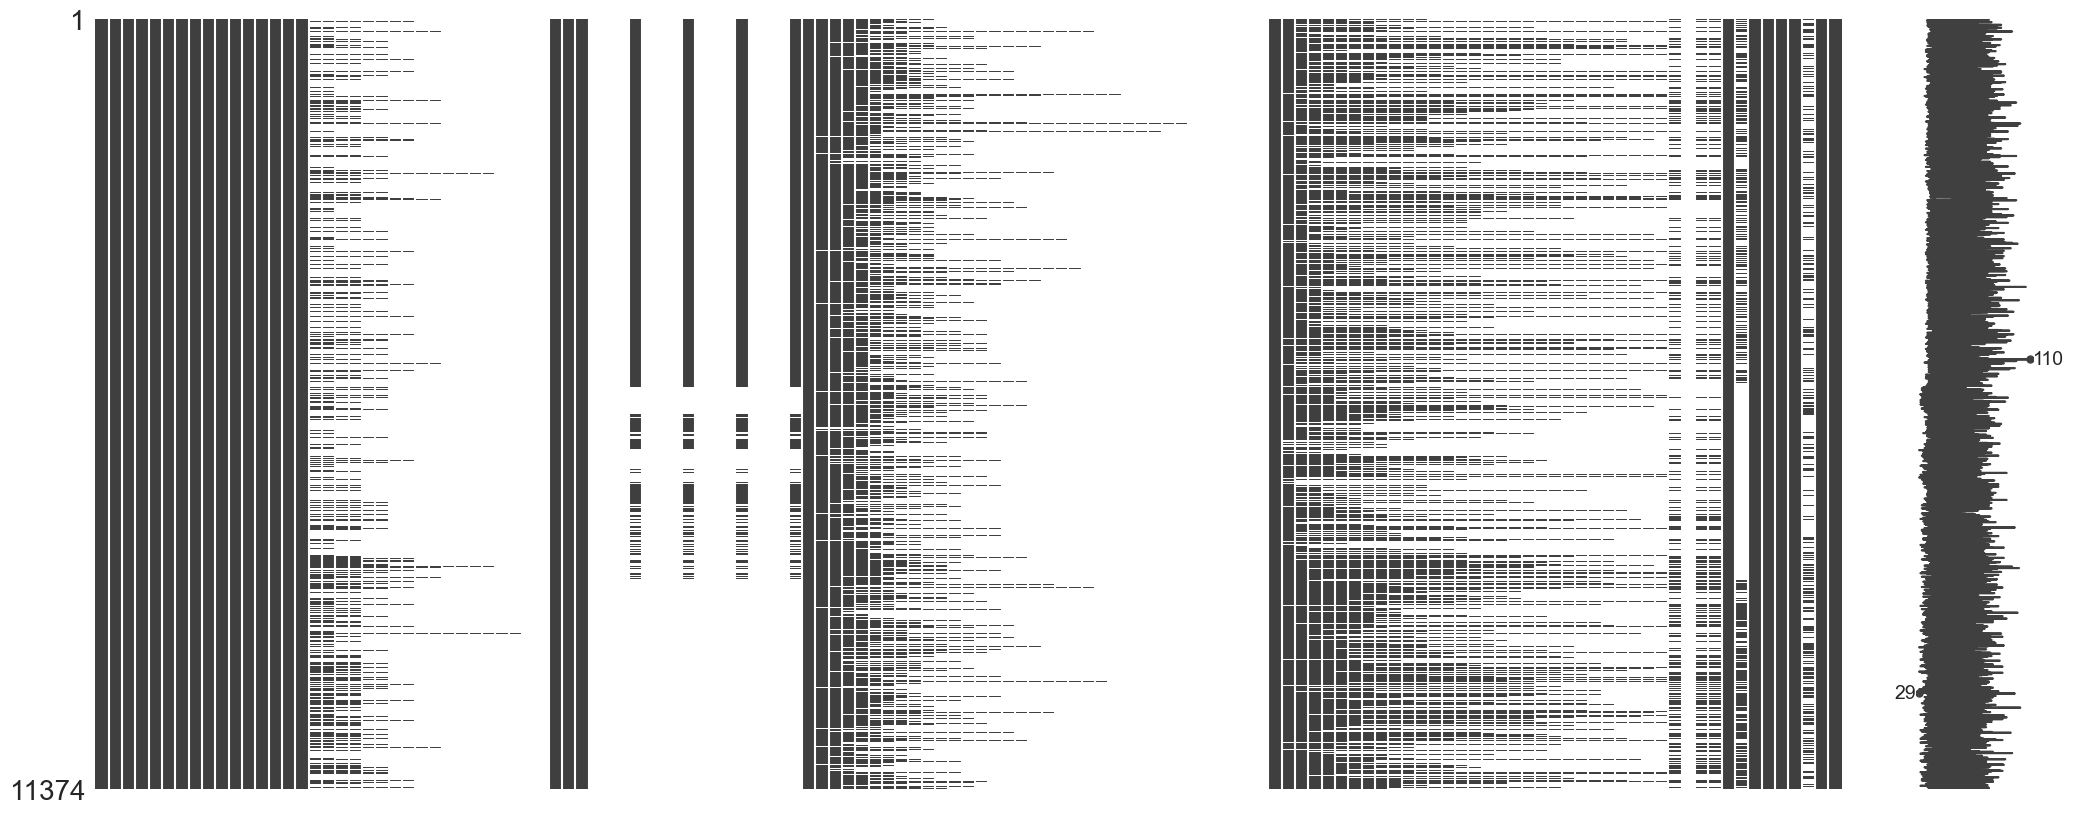

In [14]:
resumen_faltantes = aux.analizar_valores_faltantes(torax_pandas)
display(resumen_faltantes.iloc[:50])
display(resumen_faltantes.iloc[50:100])
display(resumen_faltantes.iloc[100:])


## Cantidad de Dias Estada Totales

ANIO_EGRESO
2019   41889 days
2020   31032 days
2021   36600 days
Name: ESTANCIA, dtype: timedelta64[ns]

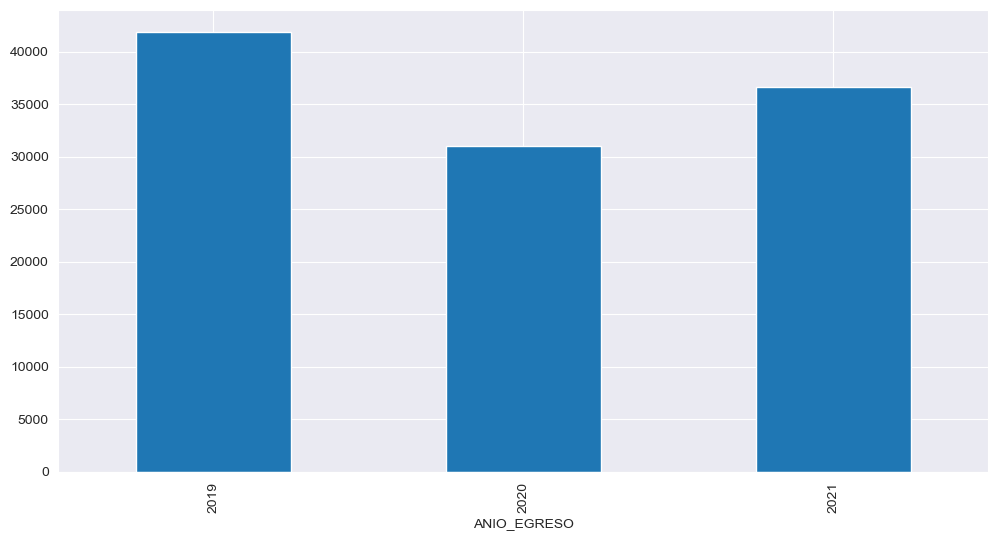

In [15]:
dias_estada_totales = torax_pandas.groupby("ANIO_EGRESO")["ESTANCIA"].sum()
display(dias_estada_totales)
dias_estada_totales.dt.days.plot(kind="bar")
plt.show()